# Gathering Data for the Project

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [158]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##  Gathering The WeRateDogs Twitter archive

In [159]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

## Gathering The tweet image predictions

In [160]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [161]:
with open('image_predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

In [162]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

## Gathering tweet_json file

In [163]:
df_list = []

with open('tweet-json.txt', 'r', encoding = 'utf-8') as file :
    for line in file :
        tweet = json.loads(line)
        #print(tweet.keys())
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        #break
        
        df_list.append({
                        'tweet_id' : tweet_id,
            'retweet_count' : retweet_count,
            'favorite_count' : favorite_count
        })
        
retweet_fav_counts = pd.DataFrame(df_list , columns = ['tweet_id', 'retweet_count', 'favorite_count'])
      

# Assessing


In [164]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [165]:
archive.shape

(2356, 17)

In [166]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tessa        1
his          1
Tess         1
Jangle       1
Cora         1
Name: name, Length: 957, dtype: int64

In [167]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [168]:
archive.expanded_urls.isna().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [169]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [170]:
image_predictions['p3_dog']

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071    False
2072     True
2073     True
2074    False
Name: p3_dog, Length: 2075, dtype: bool

In [171]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [172]:
retweet_fav_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [173]:
retweet_fav_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [174]:
retweet_fav_counts['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

## Quality Issues
  - retweets and replys in archive file **(Done)**
  - columns like [in_reply_to_status_id,source, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] nearly don't have any data, no need for them **(Done)**
  - Not All rating_denominator is 10 **(Done)**
  - Null Values in expanded_urls **(Done)**
  - timestamp dtype is an object it should be datetime64[ns] **(Done)**
  - False values in p3_dog, p2_dog, p1_dog **(Done)**
  - Tweets in Archive file don't have image **(Done)**
  - Tweets in image_predictions don't have Text **(Done)**
  - None Value in the four columns [doggo, floofer, pupper, puppo] **(Done)**
 
 
 
## Tidiness Issues
 - values defined as a columns like in archive:  (doggo, floofer, pupper, puppo) **(Done)**
 - retweet_count - favorite_count columns in a separate Table **(Done)**
 - image_predictions_clean values defines as columns **(Done)**

## Cleaning

### Copying the data

In [175]:
image_predictions_clean = image_predictions.copy()

In [176]:
archive_clean = archive.copy()

In [177]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1045,743595368194129920,NaN,NaN,2016-06-17 00:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harold. He looks slippery af. Probably...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
1658,683111407806746624,NaN,NaN,2016-01-02 02:23:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He thought the New Year's parti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407...,10,10,Larry,None,None,pupper,None


### Define

 - remove retweets and replys from the archive_clean file

In [178]:
archive_clean.in_reply_to_status_id.value_counts(dropna= True)

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

### Code
 - Remove the rows that have reply content not tweet

In [179]:
reply_to_be_deleted = archive_clean.query('in_reply_to_status_id != "NaN"').index
archive_clean.drop(reply_to_be_deleted, axis = 0, inplace = True)

### Test

In [180]:
reply_to_be_deleted_test = archive_clean.query('in_reply_to_status_id != "NaN"').index
reply_to_be_deleted_test

Int64Index([], dtype='int64')

### Code
 - Remove the rows that have retweet content not tweet

In [181]:
retweets_to_be_deleted = archive_clean.query('retweeted_status_id != "NaN"').index
retweets_to_be_deleted

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [182]:
archive_clean.drop(retweets_to_be_deleted, axis = 0 , inplace = True)

### Test

In [183]:
retweets_to_be_deleted_test = archive_clean.query('retweeted_status_id != "NaN"').index
retweets_to_be_deleted_test

Int64Index([], dtype='int64')

### Define 

 - columns like [in_reply_to_status_id,source, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] nearly don't have any data, no need for them 

In [184]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Code

In [185]:
archive_clean.drop(columns = ['in_reply_to_status_id','source', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test

In [186]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   expanded_urls       2094 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Define

- remove null Values in expanded_urls

In [187]:
archive_clean.expanded_urls.isna().value_counts()

False    2094
True        3
Name: expanded_urls, dtype: int64

#### Code

In [188]:
archive_clean.dropna(axis =0 , subset = ['expanded_urls'], inplace = True)

#### Test

In [189]:
archive_clean.expanded_urls.isna().value_counts()

False    2094
Name: expanded_urls, dtype: int64

#### Define

 - change all rating_denominator to be 10


In [190]:
archive_clean.rating_denominator.value_counts()

10     2077
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [191]:
for value in archive_clean.rating_denominator :
    archive_clean.replace(to_replace = value , value = 10, inplace = True)

### Test

In [192]:
archive_clean.rating_denominator.value_counts()

10    2094
Name: rating_denominator, dtype: int64

In [193]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   text                2094 non-null   object
 3   expanded_urls       2094 non-null   object
 4   rating_numerator    2094 non-null   int64 
 5   rating_denominator  2094 non-null   int64 
 6   name                2094 non-null   object
 7   doggo               2094 non-null   object
 8   floofer             2094 non-null   object
 9   pupper              2094 non-null   object
 10  puppo               2094 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.3+ KB


In [194]:
archive_clean.rating_numerator.value_counts()

10      910
12      485
13      287
9       153
8        98
14       38
5        34
6        32
3        19
4        16
1         5
165       1
60        1
24        1
26        1
44        1
144       1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

### Define 
 - Drop tweets in image_predictions that don't have Text in Archive_clean file 

In [195]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [196]:
out_join_image_predictions = image_predictions.loc[~image_predictions.tweet_id.isin(archive_clean.tweet_id), ].index
out_join_image_predictions

Int64Index([  94,   95,  183,  314,  453,  460,  463,  479,  493,  502,
            ...
            1903, 1921, 1940, 1944, 1950, 1964, 1992, 2006, 2041, 2055],
           dtype='int64', length=104)

### Code

In [197]:
image_predictions_clean.drop(out_join_image_predictions, axis = 0, inplace = True)

### Test

In [198]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


### Define 
 - dropp all the tweets in Archive file that don't have image in image_predictions file

In [199]:
out_join_archive_clean = archive_clean.loc[~archive_clean.tweet_id.isin(image_predictions.tweet_id), ].index
out_join_archive_clean

Int64Index([  35,   42,   72,   83,   88,  110,  133,  190,  192,  241,
            ...
            1743, 1750, 1760, 1776, 1791, 1807, 1818, 1834, 1916, 2212],
           dtype='int64', length=123)

### Code

In [200]:
archive_clean.drop(out_join_archive_clean, axis = 0, inplace = True)

### Test

In [201]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   text                1971 non-null   object
 3   expanded_urls       1971 non-null   object
 4   rating_numerator    1971 non-null   int64 
 5   rating_denominator  1971 non-null   int64 
 6   name                1971 non-null   object
 7   doggo               1971 non-null   object
 8   floofer             1971 non-null   object
 9   pupper              1971 non-null   object
 10  puppo               1971 non-null   object
dtypes: int64(3), object(8)
memory usage: 184.8+ KB


### Define 

 - Change timestamp dtype from being an object to be datetime64[ns]

In [202]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   text                1971 non-null   object
 3   expanded_urls       1971 non-null   object
 4   rating_numerator    1971 non-null   int64 
 5   rating_denominator  1971 non-null   int64 
 6   name                1971 non-null   object
 7   doggo               1971 non-null   object
 8   floofer             1971 non-null   object
 9   pupper              1971 non-null   object
 10  puppo               1971 non-null   object
dtypes: int64(3), object(8)
memory usage: 184.8+ KB


### Code

In [203]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64')

### Test

In [204]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   doggo               1971 non-null   object        
 8   floofer             1971 non-null   object        
 9   pupper              1971 non-null   object        
 10  puppo               1971 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 184.8+ KB


### Define
 - Change the columns like (doggo, floofer, pupper, puppo)  in archive to be one columns 

In [205]:
archive_clean.doggo.value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

### Code
 - remove None Value and concatenate the four columns [doggo, floofer, pupper, puppo]
 - Edit the Row that have acombination of two values 
 - Drop the useless Columns [doggo, floofer, pupper, puppo]

In [206]:
archive_clean.doggo.replace("None", "" , inplace = True)
archive_clean.floofer.replace("None", "", inplace = True)
archive_clean.pupper.replace("None", "", inplace = True)
archive_clean.puppo.replace("None", "", inplace = True)

archive_clean.puppo.replace( np.NaN,"", inplace = True)
archive_clean.doggo.replace( np.NaN,"", inplace = True)
archive_clean.floofer.replace( np.NaN,"", inplace = True)
archive_clean.pupper.replace(np.NaN,"", inplace = True)

archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

archive_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [207]:
archive_clean.loc[archive_clean.dog_stage == 'doggopupper' , 'dog_stage'] = 'doggo - pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo' , 'dog_stage'] = 'doggo - puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer' , 'dog_stage'] = 'doggo - floofer'

In [208]:
archive_clean.dog_stage.value_counts()

                   1668
pupper              201
doggo                63
puppo                22
doggo - pupper        8
floofer               7
doggo - floofer       1
doggo - puppo         1
Name: dog_stage, dtype: int64

In [209]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   doggo               1971 non-null   object        
 8   floofer             1971 non-null   object        
 9   pupper              1971 non-null   object        
 10  puppo               1971 non-null   object        
 11  dog_stage           1971 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 200.2+ KB


In [210]:
archive_clean.drop(['doggo', 'floofer' , 'pupper' , 'puppo'] , axis = 1 , inplace = True)

### Test

In [211]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   dog_stage           1971 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 138.6+ KB


In [212]:
archive_clean.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
60,880465832366813184,2017-06-29 16:39:47,This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,
782,775364825476165632,2016-09-12 16:05:54,This is Finley. He's an independent doggo stil...,https://twitter.com/dog_rates/status/775364825...,10,10,Finley,doggo
1825,676470639084101634,2015-12-14 18:35:43,Three generations of pupper. 11/10 for all htt...,https://twitter.com/dog_rates/status/676470639...,10,10,None,pupper
321,834209720923721728,2017-02-22 01:14:30,This is Wilson. He's aware that he has somethi...,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,
331,832998151111966721,2017-02-18 17:00:10,This is Rhino. He arrived at a shelter with an...,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo


In [213]:
retweet_fav_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define 
- Adding retweet_count - favorite_count columns from retweet_fav_counts file to Archive_clean Table  

In [214]:
archive_clean = archive_clean.merge(retweet_fav_counts)

In [215]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   dog_stage           1971 non-null   object        
 8   retweet_count       1971 non-null   int64         
 9   favorite_count      1971 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 169.4+ KB


In [216]:
archive_clean.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1329,682003177596559360,2015-12-30 01:00:03,Unique dog here. Wrinkly as hell. Weird segmen...,https://twitter.com/dog_rates/status/682003177...,5,10,None,,1722,3464
318,821044531881721856,2017-01-16 17:20:45,This is Flash. He went way too hard celebratin...,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,,2636,14021


### Define 
 - Merge image_predictions columns with archive_clean table
 - amended the structure of image_predictions_clean Columns in archive_clean file (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog, p3, p3_conf,p3_dog) to be just values not variables
 - remove all rows that have False value in p1_dog column

In [217]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Coding

In [220]:
image_predictions_clean.rename(columns = {'p1_conf' : 'p1_conf-1','p2_conf' : 'p1_conf-2','p3_conf' : 'p1_conf-3', 'p1_dog' :'p1_dog-1','p2_dog' :'p1_dog-2','p3_dog' :'p1_dog-3', 'p1':'p1-1','p3':'p1-3','p2':'p1-2'}, inplace = True)

In [221]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1971 non-null   int64  
 1   jpg_url    1971 non-null   object 
 2   img_num    1971 non-null   int64  
 3   p1-1       1971 non-null   object 
 4   p1_conf-1  1971 non-null   float64
 5   p1_dog-1   1971 non-null   bool   
 6   p1-2       1971 non-null   object 
 7   p1_conf-2  1971 non-null   float64
 8   p1_dog-2   1971 non-null   bool   
 9   p1-3       1971 non-null   object 
 10  p1_conf-3  1971 non-null   float64
 11  p1_dog-3   1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [222]:
archive_clean = archive_clean.merge(image_predictions_clean)

In [228]:
archive_clean = pd.wide_to_long(archive_clean, ['p1', 'p1_conf' , 'p1_dog'], i = 'tweet_id' , j= 'Prediction_level' , sep= '-')

### Test

In [229]:
archive_clean.head(3)

,,retweet_count,expanded_urls,favorite_count,name,dog_stage,rating_denominator,jpg_url,img_num,timestamp,text,rating_numerator,p1,p1_conf,p1_dog
tweet_id,Prediction_level,,,,,,,,,,,,,,
892420643555336193,1,8853,https://twitter.com/dog_rates/status/892420643...,39467,Phineas,,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,orange,0.097049,False
892177421306343426,1,6514,https://twitter.com/dog_rates/status/892177421...,33819,Tilly,,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Chihuahua,0.323581,True
891815181378084864,1,4328,https://twitter.com/dog_rates/status/891815181...,25461,Archie,,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,Chihuahua,0.716012,True


In [230]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5913 entries, (892420643555336193, 1) to (666020888022790149, 3)
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   retweet_count       5913 non-null   int64         
 1   expanded_urls       5913 non-null   object        
 2   favorite_count      5913 non-null   int64         
 3   name                5913 non-null   object        
 4   dog_stage           5913 non-null   object        
 5   rating_denominator  5913 non-null   int64         
 6   jpg_url             5913 non-null   object        
 7   img_num             5913 non-null   int64         
 8   timestamp           5913 non-null   datetime64[ns]
 9   text                5913 non-null   object        
 10  rating_numerator    5913 non-null   int64         
 11  p1                  5913 non-null   object        
 12  p1_conf             5913 non-null   float64       
 13  p1_dog 

### Code 
 - removing all rows that have False value in p1_dog column

In [234]:
false_index_toBe_deleted = archive_clean.query('p1_dog == False').index

In [235]:
archive_clean.drop(false_index_toBe_deleted, axis = 0, inplace= True)

### Test

In [239]:
archive_clean.p1_dog.value_counts()

True    4374
Name: p1_dog, dtype: int64

## Analysis

In [258]:
most_confident_breeds = archive_clean.query('p1_conf > 0.65').p1.value_counts()[:10]
most_confident_breeds

golden_retriever      92
Pembroke              58
Labrador_retriever    53
pug                   36
Chihuahua             34
Samoyed               24
Pomeranian            24
chow                  21
French_bulldog        19
toy_poodle            17
Name: p1, dtype: int64

In [241]:
archive_clean.describe()

,retweet_count,favorite_count,rating_denominator,img_num,rating_numerator,p1_conf
count,4374.000000,4374.000000,4374.0,4374.000000,4374.000000,4374.000000
mean,2813.391632,9320.270233,10.0,1.218336,11.191358,0.273186
std,4739.082448,12601.543805,0.0,0.576721,6.882750,0.294901
min,16.000000,81.000000,10.0,1.000000,0.000000,0.000001
25%,652.000000,2232.000000,10.0,1.000000,10.000000,0.052126
50%,1443.000000,4523.000000,10.0,1.000000,10.000000,0.146191
75%,3265.750000,11838.000000,10.0,1.000000,12.000000,0.407092
max,79515.000000,132810.000000,10.0,4.000000,165.000000,0.999956


Text(0.5, 0, 'Breeds')

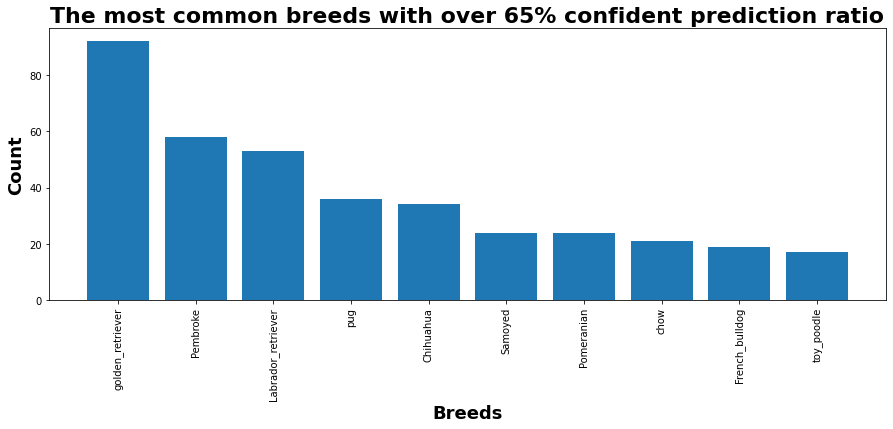

In [242]:
plt.figure(figsize=(15,5))
plt.title('The most common breeds with over 65% confident prediction ratio', fontsize = 22, fontweight = 'bold')
plt.bar(x=most_confident_breeds.index, height=most_confident_breeds)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize = 18, fontweight = 'bold')
plt.xlabel('Breeds', fontsize = 18, fontweight = 'bold')


In [261]:
dog_stage_counts = archive_clean.dog_stage.value_counts()[1:]
dog_stage_counts

pupper             433
doggo              142
puppo               60
floofer             20
doggo - pupper      18
doggo - floofer      3
doggo - puppo        3
Name: dog_stage, dtype: int64

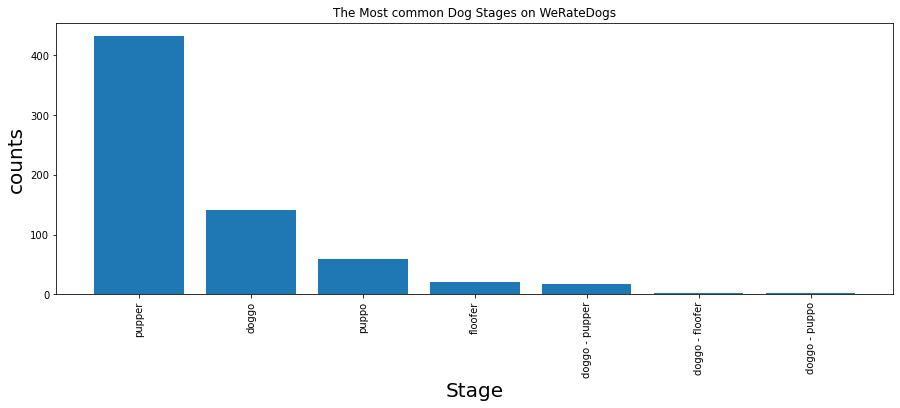

In [267]:

plt.figure(figsize=(15,5));
plt.bar(x=dog_stage_counts.index, height=dog_stage_counts);
plt.xlabel('Stage', fontsize = 20)
plt.ylabel('counts', fontsize = 20)
plt.title('The Most common Dog Stages on WeRateDogs')
plt.xticks(rotation=90);

In [268]:
retweet = archive_clean.groupby('dog_stage').retweet_count.mean()[1:]
retweet

dog_stage
doggo               7050.915493
doggo - floofer     3433.000000
doggo - pupper      4316.666667
doggo - puppo      19196.000000
floofer             5091.700000
pupper              2467.217090
puppo               6508.350000
Name: retweet_count, dtype: float64

In [269]:
fav_count = archive_clean.groupby('dog_stage').favorite_count.mean()[1:]
fav_count

dog_stage
doggo              19405.063380
doggo - floofer    17169.000000
doggo - pupper     13153.055556
doggo - puppo      47844.000000
floofer            13562.500000
pupper              7735.997691
puppo              21991.816667
Name: favorite_count, dtype: float64

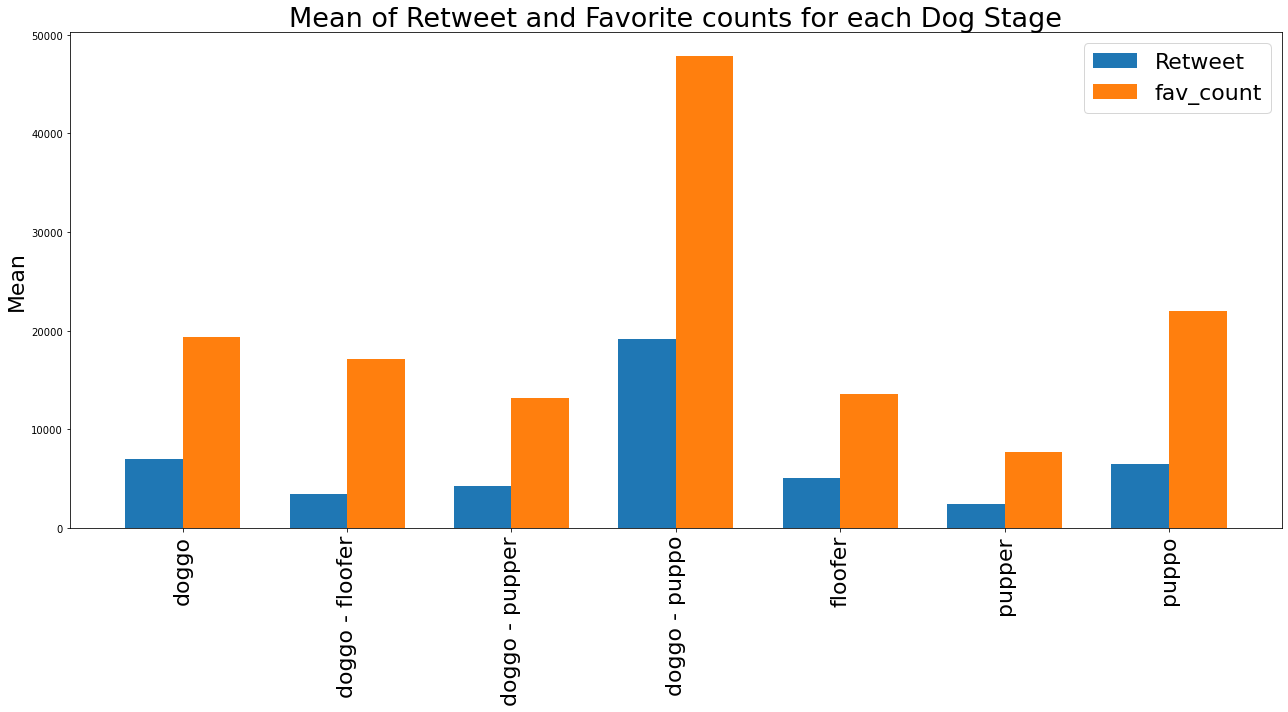

In [247]:
#plt.figure(figsize=(15,5));
labels = retweet.index


x = np.arange(len(labels))
width = 0.35  
fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width/2, list(retweet), width, label='Retweet')
rects2 = ax.bar(x + width/2, list(fav_count), width, label='fav_count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean',fontsize = 22)
ax.set_title('Mean of Retweet and Favorite counts for each Dog Stage', fontsize = 27)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical', fontsize = 22)
ax.legend(fontsize = 22)

fig.tight_layout()

plt.show()

## Storage

In [270]:
archive_clean.to_csv('twitter_archive_master.csv')